# Membership functions

Author: Gary Marigliano, based on the work of Hector Satizabal

- Professor: Carlos Peña (<a href="mailto:carlos.pena@heig-vd.ch">carlos.pena@heig-vd.ch</a>)
- Assistant 2018: Gary Marigliano (<a href="mailto:gary.marigliano@heig-vd.ch">gary.marigliano@heig-vd.ch</a>)
- Assistant 2019: Diogo Leite (<a href="mailto:diogo.leite@heig-vd.ch">diogo.leite@heig-vd.ch</a>)

Date: Winter 2019

## Instructions:

* Read this notebook
* Do/Answer where **TODO student** is specified
* The folder structure is like this:

```
fuzzy_systems
├── core
└── view
```

* `core` contains core classes like membership_functions, fuzzy_rules,...
* `view` contains classes used to display what the core classes do.
* when you will do the exercises, please follow the same convention.


**TODO student** Read and explore the code provided both in this folder.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

With Jupyter it is possible to execute command line programs by using prefixing the cell with a "!". Here we show/"cat" the content of a file. /!\ Pygmentize should be installed with your virtualenv.

In [2]:
!pygmentize fuzzy_systems/core/membership_functions/free_shape_mf.py

import numpy as np


class FreeShapeMF:
    def __init__(self, in_values, mf_values):
        """
        Build a membership function by defining input values (x axis, in_values)
        and corresponding output values (y axis, mf_values)

        This class is the most basic way available to create membership
        functions.

        :param in_values:
        :param mf_values:
        """
        assert len(in_values) == len(
            mf_values), "Input and MF values are not the same length"

        self._in_values = np.array(in_values)
        self._mf_values = np.array(mf_values)

    def fuzzify(self, in_value):
        # return the nearest mf value for a given in_value using interpolation
        return np.interp(in_value, self._in_values, self._mf_values)

    @property
    def in_values(self):
        return self._in_values

    @property
    def mf_values(self):
        return self._mf_values


## Some examples of membership functions

- Common membership functions are "crisp" (or Boolean), "Triangular", and "Trapezoidal".

[N/A] value 3.2 has been fuzzified to 1.0


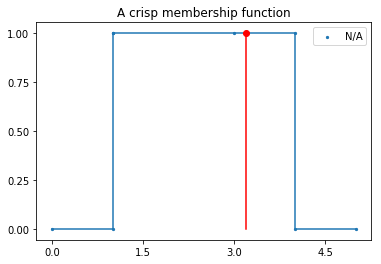

In [3]:
# import core classes
from fuzzy_systems.core.membership_functions.free_shape_mf import FreeShapeMF

# import view classes
from fuzzy_systems.view.mf_viewer import MembershipFunctionViewer

fig, ax = plt.subplots()
ax.set_title("A crisp membership function")

in_values = [0,1,1,1,3,4,4,5]
mf_values = [0,0,1,1,1,1,0,0]

mf = FreeShapeMF(in_values, mf_values)
mfv = MembershipFunctionViewer(mf, ax=ax, label="N/A")
mfv.fuzzify(3.2)
plt.legend()
plt.show()


### Triangular MF

In the following example we will show an other popular membership function, the triangular membership function.

But creating membership functions by hand is painful. Let's create a class that will help us.

* Reminder: **you should NOT create a class directly in the notebook**. You must create it in the right folder, here in core/membership_functions.

In [4]:
class BasicTriangularMF(FreeShapeMF):
    def __init__(self, p_min, p_mid, p_max):
        in_values = [p_min, p_mid, p_max]
        mf_values = [0, 1, 0]
        super().__init__(in_values, mf_values)


[N/A] value 14 has been fuzzified to 0.4


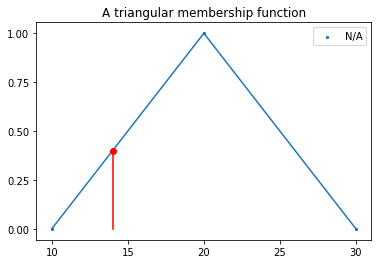

In [5]:
tri_mf = BasicTriangularMF(p_min=10, p_mid=20, p_max=30)

fig, ax = plt.subplots()
ax.set_title("A triangular membership function")
mfv = MembershipFunctionViewer(tri_mf, ax=ax, label="N/A")
mfv.fuzzify(14)
plt.legend()
plt.show()

## Linear piecewise MF

A linear piecewise membership function (LinPWMF) is a membership that is defined by linear parts (i.e. "a list of lines"). It is not common to use LinPWMFs as is but it is very convienient to subclass it to create other common MF such as TrapezoidalMF or TriangularMF.

Here is an example of the provided LinPWMF

In [8]:
!pygmentize fuzzy_systems/core/membership_functions/lin_piece_wise_mf.py

import numpy as np

from fuzzy_systems.core.membership_functions.free_shape_mf import FreeShapeMF


def gen_line(p0, p1, n_points):
    """
    Generate a line (list of xs and ys) given two points p0 and p1.
    This function handles vertical and horizontal lines
    :param p0: a point as x0 and y0
    :param p1: a point as x1 and y1
    :param n_points: number of points to generate
    :return: xs, ys as list of x and list of y of the generated line
    """
    points_same_x = abs(p1[0] - p0[0]) < 1e-6
    points_same_y = abs(p1[1] - p0[1]) < 1e-6
    if points_same_y and points_same_x:
        return [p0[0]], [p0[1]]

    if points_same_x:
        return [p0[0], p1[0]], [p0[1], p1[1]]

    xs = np.linspace(p0[0], p1[0], n_points)
    slope = (p1[1] - p0[1]) / (p1[0] - p0[0])
    ys = [slope * (x - p0[0]) + p0[1] for x in xs]

    return xs, ys


class LinPWMF(FreeShapeMF):
    """
    This class produce a "linear piece-wise function"-like membership function
    This is a more "gener

[N/A] value 14 has been fuzzified to 0.12


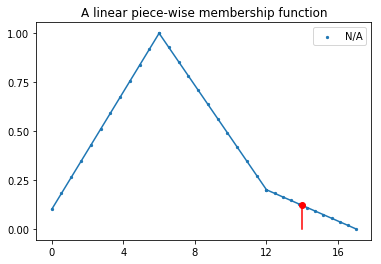

In [9]:
from fuzzy_systems.core.membership_functions.lin_piece_wise_mf import LinPWMF

lin_mf = LinPWMF([0, 0.1], [6, 1.0], [12, 0.2], [17, 0.0])

fig, ax = plt.subplots()
ax.set_title("A linear piece-wise membership function")
mfv = MembershipFunctionViewer(lin_mf, ax=ax, label="N/A")
mfv.fuzzify(14)
plt.legend()
plt.show()


## Exercise

**TODO student**

- Test the functions above. Play with the parameters of each membership functions and observe the results.

- Using the provided functions as starting point, implement a new trapezoidal membership class (**in core/membership_functions/trap_mf.py**) without the constraint of being isosceles. 

- To implement it, you will need to extends/inherit from LinPWMF. You can use this snippet for example:

```python 
class TrapMF(LinPWMF):
    def __init__(self, p0, p1, p2, p3):
        #TODO student
```

- Use `MembershipFunctionViewer` to demonstrate how well your implementation works with some relevant test cases/examples.

```
                         p1           p2
                         x____________x
                        /             |
                       /              |
                      /               |
               ______x                x_______
                    p0                p3
```                                       

AxesSubplot(0.125,0.125;0.775x0.755)
[N/A] value 2 has been fuzzified to 0.1


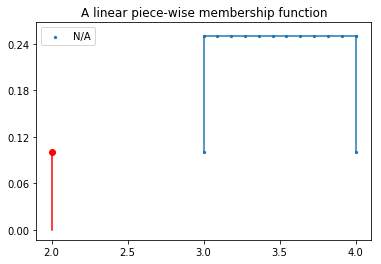

In [41]:
from fuzzy_systems.core.membership_functions.lin_piece_wise_mf import LinPWMF

lin_mf = LinPWMF([4, 0.1], [4, 0.25], [3, 0.25], [3, 0.1])

fig, ax = plt.subplots()
print(ax)
ax.set_title("A linear piece-wise membership function")
mfv = MembershipFunctionViewer(lin_mf, ax=ax, label="N/A")
mfv.fuzzify(2)
plt.legend()
plt.show()

class TrapMF(LinPWMF):
    def __init__(self, p0, p1, p2, p3):
        lin_mf = LinPWMF(p0, p1, p2, p3)
        

## To further explore about membership functions... 

### Singleton MFs

**TODO student**


                                                 |
                                                 |
                                                 |
                                  _______________|_______________
                                  
- A special membership function is the so-called "singleton", in which all the membership is "concentrated" in a single point.
    - In your opinion, what is the meaning of such a function?
    - Do you see an utility for the use of singleton membership functions?
    - Implement a SingletonMF (**in core/membership_functions/singleton_mf.py**). Requirement 1: the constructor is `mf = SingletonMF(x)` where `x` is the input value where `y = 1`. Requirement 2: You must inherit from FreeShapeMF. Tip: you might need to override `fuzzify()` to make it work.
    -  Use `MembershipFunctionViewer` to demonstrate how well your implementation works with some relevant test cases/examples.
    
### Smooth MFs
- Smoother membership functions (e.g., Gaussian, exponential, or sigmoid) are also very common in fuzzy logic.
    - In your opinion what could be the pros and cons of these smooth functions as compared to their edgier counterparts?

### Arbitrary MFs
- There is no formal need for a membership function to have a convex, coherent shape (as those explored until now). So, they could be as arbitrary as you want or need.
    - In your opinion what could be the pros and cons of using arbitrary membership functions as compared to their well-behaved counterparts?


-----------------

# Please answer below this

**TODO student**: 

- Implement what is asked in the right folders
- Write the answer to the questions asked just below. For example:

>In your opinion, what is the meaning of such a function?

blablabla

>Use `MembershipFunctionViewer` to demonstrate how well your implementation works with some relevant test cases/examples.

_add some plots here..._

In [8]:
#TODO student... 

### To submit

Please make a zip called `lfa_labXX_YY.zip` where `XX` is the lab number and `YY` is your familly name. For example: `lfa_lab02_smith.zip`. 

The zip must contain all _needed_ the files to run this notebook. That is, don't send your virtualenv (only the requirements.txt). **If any additional steps are required to run your notebook(s)/code, please add a README.md where you indicate all the needed steps to reproduce your work.**